In [33]:
import tensorflow as tf
import numpy as np
import tensorflow_probability as tfp
import sys
import scipy.io
sys.path.append("..")
import ODE_Dynamics as od
import Test_Likelihood as tl
import Positive_Symptom_fn as fn

In [34]:
data = scipy.io.loadmat('../data/test_data_simulation.mat')
x = tf.cast(data['data_simulation'],dtype = tf.float32)
test_data = np.reshape(
      x, x.shape)

In [35]:
test_data = tf.transpose(test_data)
print(test_data)

tf.Tensor(
[[0.000e+00 9.850e+02 0.000e+00]
 [1.000e+00 1.046e+03 2.000e+00]
 [2.000e+00 9.660e+02 5.000e+00]
 [3.000e+00 9.900e+02 7.000e+00]
 [4.000e+00 1.019e+03 5.000e+00]
 [5.000e+00 9.670e+02 1.200e+01]
 [6.000e+00 1.017e+03 1.000e+01]
 [7.000e+00 1.023e+03 7.000e+00]
 [8.000e+00 1.006e+03 1.000e+01]
 [9.000e+00 1.069e+03 1.300e+01]
 [1.000e+01 1.033e+03 1.000e+01]
 [1.100e+01 9.990e+02 8.000e+00]
 [1.200e+01 1.039e+03 8.000e+00]
 [1.300e+01 1.048e+03 1.400e+01]
 [1.400e+01 1.053e+03 1.000e+01]
 [1.500e+01 1.033e+03 1.600e+01]
 [1.600e+01 1.043e+03 1.700e+01]
 [1.700e+01 1.044e+03 2.000e+01]
 [1.800e+01 1.026e+03 2.200e+01]
 [1.900e+01 1.032e+03 3.000e+01]
 [2.000e+01 1.027e+03 2.600e+01]
 [2.100e+01 1.075e+03 2.800e+01]
 [2.200e+01 1.066e+03 3.100e+01]
 [2.300e+01 1.057e+03 3.400e+01]
 [2.400e+01 1.021e+03 3.900e+01]
 [2.500e+01 1.062e+03 4.500e+01]
 [2.600e+01 1.068e+03 4.300e+01]
 [2.700e+01 1.086e+03 5.100e+01]
 [2.800e+01 1.108e+03 5.700e+01]
 [2.900e+01 1.034e+03 4.900e+01]

In [36]:
vdyn_ode_fn = od.ViralDynamics

In [37]:
positive_fn = fn.proba_pos_sym(170306.4 * 1E-5).positive_fn
symptom_fn = fn.proba_pos_sym(170306.4 * 1E-5).symptom_fn

In [38]:
prob_s_ibar = 0.1

In [47]:
loglike = tl.loglik(test_data, vdyn_ode_fn, positive_fn, symptom_fn, prob_s_ibar, prob_fp=0.0, Epi_Model=od.SIR,
                 duration= 15.0, Epi_cadence=0.5, Vir_cadence=0.0625)

In [48]:
mu_b, sigma_b = 5, 1
beta = np.random.normal(mu_b, sigma_b, 1)
L = 0.0025/beta
V0 = np.random.normal(1E3, 1E2, 1)
print(V0)
X0 = 1E6
Y0 = V0
par=tf.constant(np.array([[L,0.01,beta*1E-7,0.5,20,10, V0, X0, Y0]], dtype=np.float32))
vpar = par
pospar = par
sympar = par

[1142.74957165]


In [49]:
sample_size = 1166
k = 1
index = 1
mu_b, sigma_b = 5, 1
beta = np.random.normal(mu_b, sigma_b, 1)   #"rate at which virus infects host cells"
L = 0.0025/beta
par=np.array([[L,0.01,beta*1E-7,0.5,20.0,10.0]])
V0 = np.random.normal(1E3, 1E2, 1)
X0 = 1E6
Y0 = V0
init_state=(np.array([[V0,X0,Y0]], dtype=np.float32))

while index <= sample_size - 1:
    beta = np.random.normal(mu_b, sigma_b, 1)   #"rate at which virus infects host cells"
    L = 0.0025/beta
    par_new=np.array([[L,0.01,beta*1E-7,0.5,20.0,10.0]])
    par = np.concatenate((par, par_new), axis = 0)
    V0 = np.random.normal(1E3, 1E2, 1)
    X0 = 1E6
    Y0 = V0
    init_state_new=(np.array([[V0,X0,Y0]], dtype=np.float32))
    init_state = np.concatenate((init_state, init_state_new), 0)

    index +=1
        

vpar = tf.constant(par, dtype=tf.float32)
pospar = par
sympar = par
print(par.shape)

(1166, 6)


In [50]:
epipar = tf.constant(np.array([[1.8,  5.0E-08,0.1, 0.001,0.999]], dtype=np.float32))

In [51]:
ll,pp = loglike.__call__(test_data,epipar, vpar, pospar, sympar)

In [52]:
C_xt = test_data[:,2]
N_xt = test_data[:,1]
pp_simu = C_xt/N_xt

In [53]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
plt.style.use('ggplot')
font = {'size'   : 9}
plt.rc('font', **font)

Text(0.5, 1, 'Test-positive probability likelihood function')

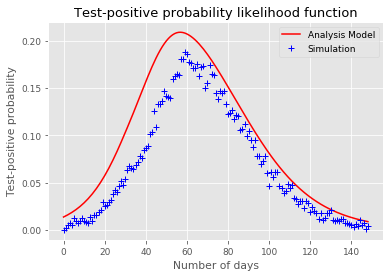

In [54]:
plt.plot(test_data[:,0], pp,"r-", label = "Analysis Model")
plt.plot(test_data[:,0], pp_simu, "b+", label = "Simulation")
plt.xlabel("Number of days")
plt.ylabel("Test-positive probability")
plt.legend(loc="upper right")
plt.savefig('simu_vs_code.pdf', dpi=300, bbox_inches='tight')
plt.title("Test-positive probability likelihood function")